In [ ]:
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [157]:
df = pd.read_csv('C://Users//maraw//Downloads//ai-summer-training-iti-group-4//diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [160]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [161]:
df.shape

(768, 9)

In [162]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 768 rows and 9 columns.


In [163]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [164]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns =df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Categorical Columns:
[]


In [165]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [166]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


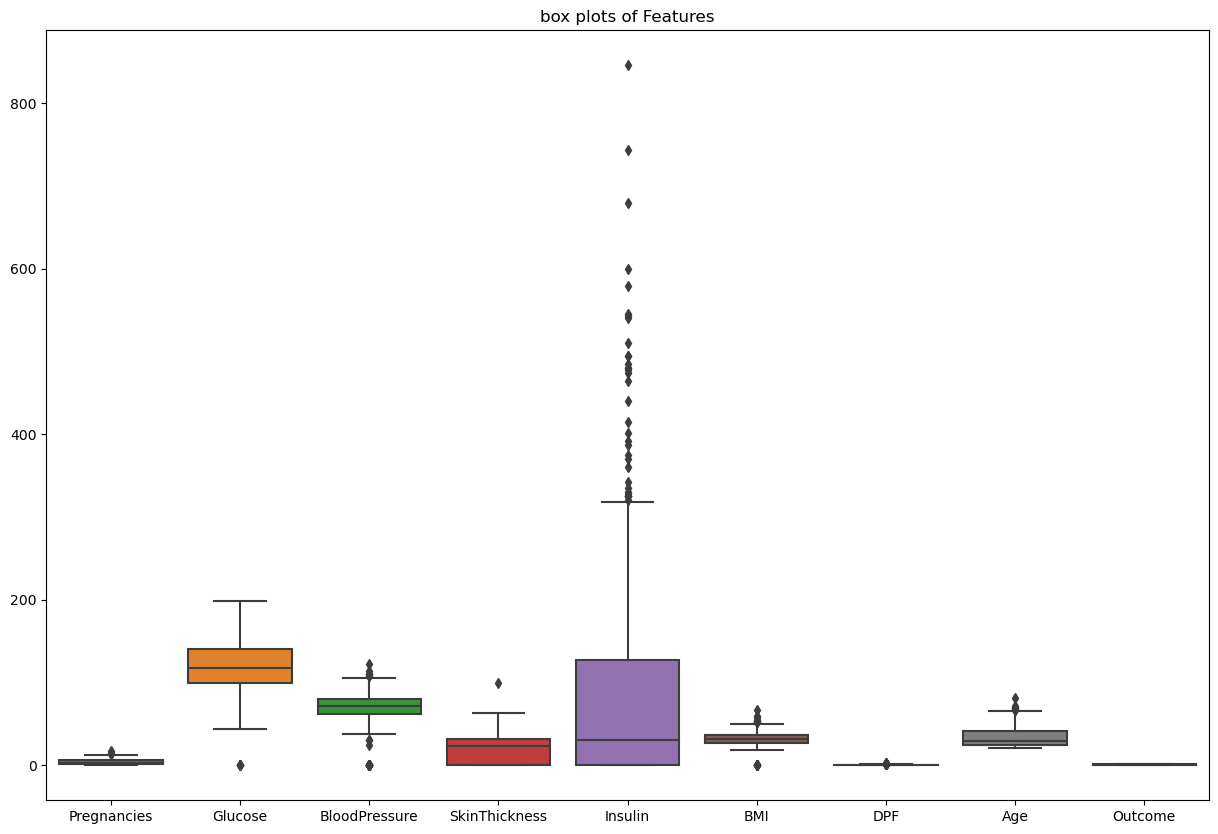

In [167]:
#box plots to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("box plots of Features")
plt.show()

In [168]:
#unsupervised section


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

file_path = 'C://Users//maraw//Downloads//ai-summer-training-iti-group-4//diabetes.csv'
data = pd.read_csv(file_path)



In [170]:
X = data.drop('DiabetesPedigreeFunction', axis=1)




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)


inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)



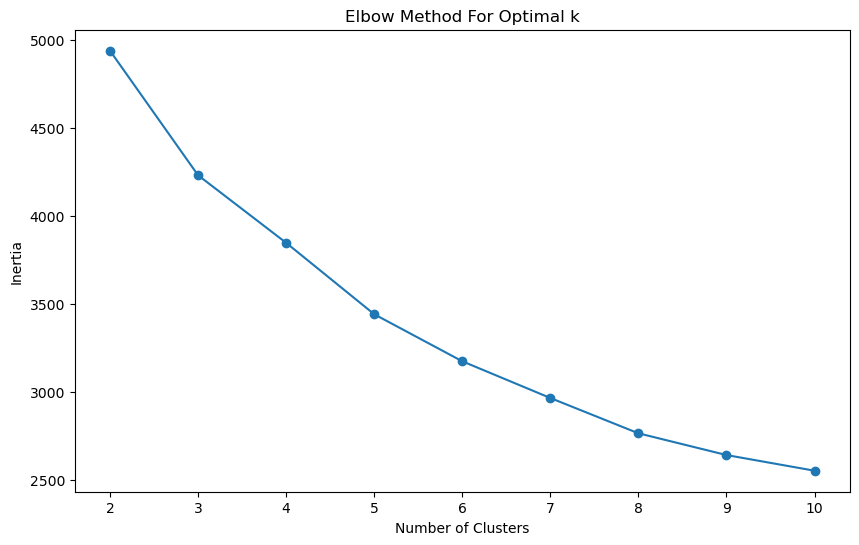

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()



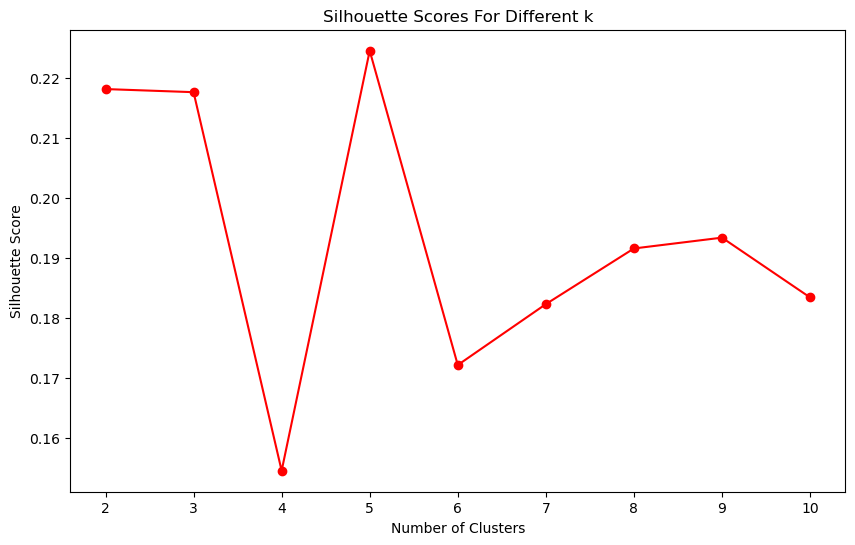

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()



In [173]:
#without scaling
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5104194050464993


In [174]:
##########################################################################################################33

In [175]:
# CLASSSICATION SECTION USING KNN,SVM,LOGISTIC,DESION TREE
#################################


In [176]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']

In [177]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [178]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [179]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, random_state=1, test_size=.30)

X_train,X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.3)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('-'*50)
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print('-'*50)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train:  (375, 8)
y_train:  (375,)
--------------------------------------------------
X_val (162, 8)
y_val (162,)
--------------------------------------------------
X_test (231, 8)
y_test (231,)


In [180]:
y_train.value_counts()

0    246
1    129
Name: Outcome, dtype: int64

<Axes: >

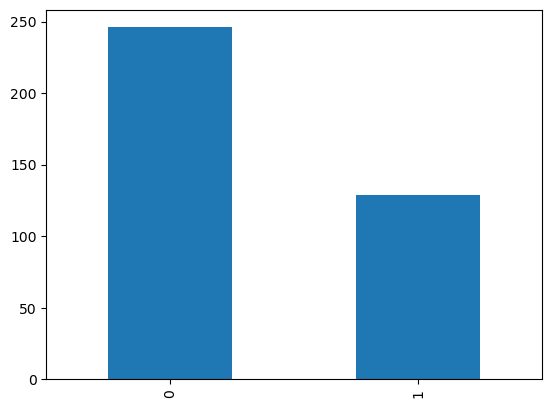

In [181]:
y_train.value_counts().plot.bar()

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [183]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [184]:
from sklearn.metrics import accuracy_score

def evaluate_model(clf, X_train,y_train, X_val ,y_val):
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__)
    print('Acc of training is: ',acc_train)
    print('Acc of validation is: ',acc_val)
    print('------------------------------')
    return acc_train, acc_val

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [186]:
tree_clf = DecisionTreeClassifier(random_state=1)
logistic_clf = LogisticRegression(random_state=1)
svc_clf = SVC(random_state=1)
knn_clf = KNeighborsClassifier(n_neighbors=10)

In [187]:
estimators = [
    ('tree',tree_clf),
    ('logistic',logistic_clf),
    ('svc',svc_clf),
    ('KNN',knn_clf)
]

In [188]:
all_estimators = estimators 


results = {
    'model': [],
    'acc train': [],
    'acc val': []
}

for (name, clf) in all_estimators:

    acc_train, acc_val = evaluate_model(clf, X_train_scaled, y_train, X_val_scaled, y_val)
    
    results['model'].append(name)
    results['acc train'].append(acc_train)
    results['acc val'].append(acc_val)


DecisionTreeClassifier
Acc of training is:  1.0
Acc of validation is:  0.6790123456790124
------------------------------
LogisticRegression
Acc of training is:  0.784
Acc of validation is:  0.7345679012345679
------------------------------
SVC
Acc of training is:  0.824
Acc of validation is:  0.7407407407407407
------------------------------
KNeighborsClassifier
Acc of training is:  0.7493333333333333
Acc of validation is:  0.7037037037037037
------------------------------


In [189]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='acc val',ascending=False,ignore_index=True)

,model,acc train,acc val
0,svc,0.824000,0.740741
1,logistic,0.784000,0.734568
2,KNN,0.749333,0.703704
3,tree,1.000000,0.679012


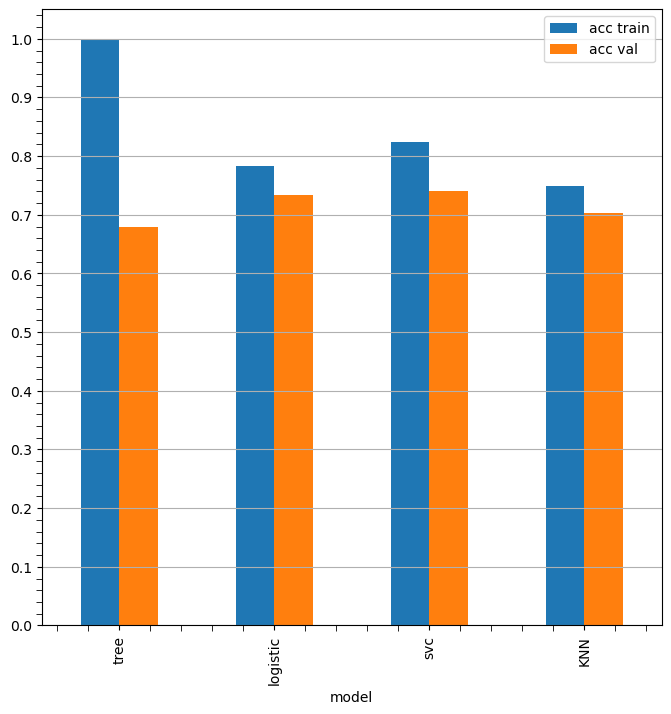

In [190]:
import matplotlib.pyplot as plt
results_df.plot.bar(x= 'model' , y=['acc train','acc val'],figsize=(8, 8))
plt.yticks( [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.minorticks_on()
plt.tick_params(which='minor', length=4)
plt.grid(axis='y')
plt.show()

In [191]:
#THE BEST MODEL IS SVC


In [192]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [193]:
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


In [194]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc:.4f}')

ROC-AUC: 0.7255


In [195]:
x=[1,89,66,23,94,28.1,0.167,21]

In [196]:
import numpy as np
x =np.array(x).reshape(1,-1)

In [197]:
x

array([[ 1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167, 21.   ]])

In [198]:
x_scaled = scaler.transform(x)
x_scaled

array([[-0.86518672, -1.02277929, -0.18171868,  0.1704044 ,  0.17288532,
        -0.51541416, -0.94586509, -1.05217468]])

In [199]:
y=svc_clf.predict(x_scaled)
y[0] 

0

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[138   8]
 [ 42  43]]


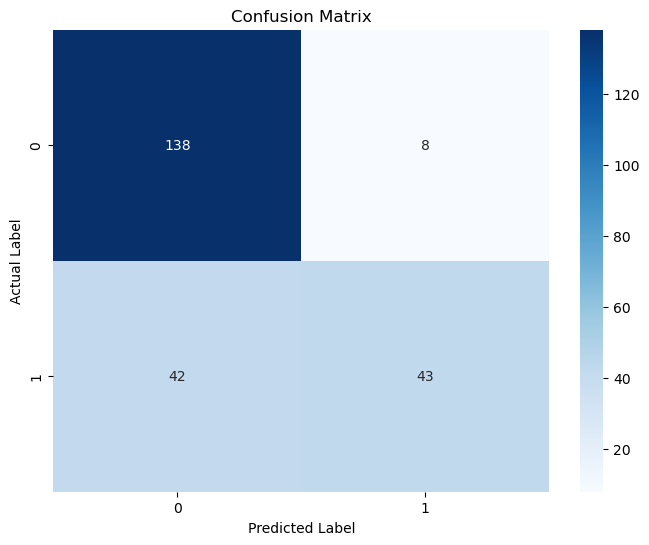

In [202]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [203]:
cm = confusion_matrix(y_test, y_pred)
precision = []
recall = []
f1_score = []

for i in range(len(cm)):
        TP = cm[i, i] 
        FP = cm[:, i].sum() - TP 
        FN = cm[i, :].sum() - TP  
        
      
        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
        
        precision.append(prec)
        recall.append(rec)
        f1_score.append(f1)

print("Confusion Matrix:\n", cm)
print("\nPrecision for each class:", precision)
print("Recall for each class:", recall)
print("F1 Score for each class:", f1_score)

Confusion Matrix:
 [[138   8]
 [ 42  43]]

Precision for each class: [0.7666666666666667, 0.8431372549019608]
Recall for each class: [0.9452054794520548, 0.5058823529411764]
F1 Score for each class: [0.8466257668711656, 0.6323529411764706]


In [204]:
#######################################################################################################3

In [205]:
# DEEP LEARNING SECTION
######################


In [206]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [207]:
df2 = pd.read_csv('C://Users//maraw//Downloads//ai-summer-training-iti-group-4//diabetes.csv')

X2 = df2.drop('Outcome', axis=1)  
y2 = df2['Outcome']



In [208]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=1)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [210]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [211]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4987 - loss: 0.8590 - val_accuracy: 0.7222 - val_loss: 0.6633
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6539 - loss: 0.6439 - val_accuracy: 0.7500 - val_loss: 0.6347
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6529 - loss: 0.6544 - val_accuracy: 0.7500 - val_loss: 0.6173
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6782 - loss: 0.6109 - val_accuracy: 0.7222 - val_loss: 0.6023
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6660 - loss: 0.5851 - val_accuracy: 0.7407 - val_loss: 0.5885
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7413 - loss: 0.5700 - val_accuracy: 0.7222 - val_loss: 0.5763
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6996 - loss: 0.5851 - val_accuracy: 0.7407 - val_loss: 0.5670
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7347 - loss: 0.5517 - val_accuracy: 0.7315 - val_loss

In [212]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_acc:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4344 
Test Accuracy: 0.7922


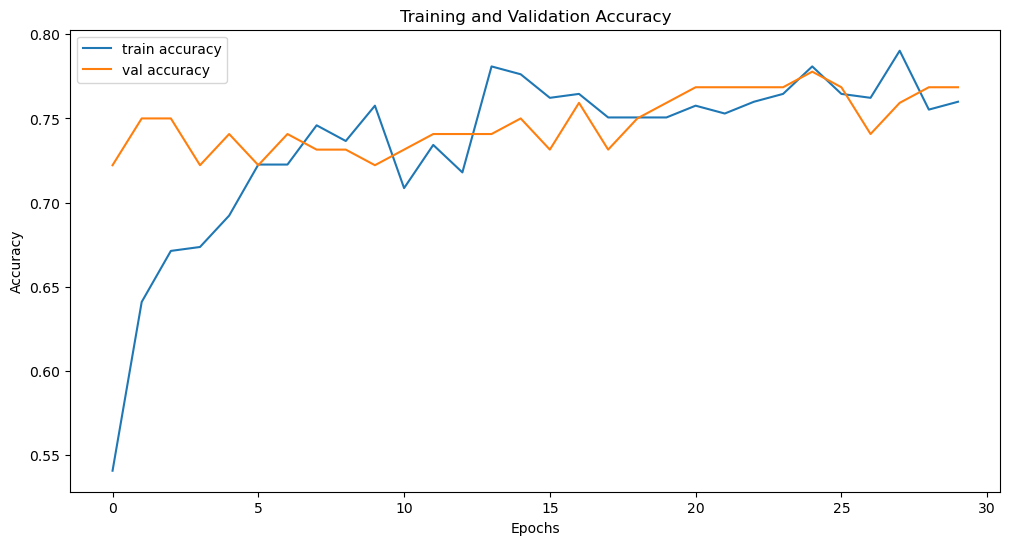

In [213]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [214]:
y_pred = np.round(model.predict(X_test))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [215]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)

array([[133,  13],
       [ 35,  50]], dtype=int64)

In [216]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc:.4f}')

ROC-AUC: 0.7496


In [217]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       146
           1       0.79      0.59      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [218]:
x=[1,89,66,23,94,28.1,0.167,21]

In [219]:
import numpy as np
x =np.array(x).reshape(1,-1)

In [220]:
x

array([[ 1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167, 21.   ]])

In [221]:
x_scaled = scaler.transform(x)
x_scaled

array([[-0.82270897, -1.02519512, -0.14687221,  0.21690158,  0.14651461,
        -0.48760851, -0.90483785, -1.02981015]])

In [222]:
y=model.predict(x_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [223]:
y[0]

array([0.03867365], dtype=float32)

In [224]:
#############################################################################3#########################

In [225]:
# REGRESSION SECTION
##################

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df3 = pd.read_csv('C://Users//maraw//Downloads//ai-summer-training-iti-group-4//diabetes.csv')
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [228]:
inputt= df3.drop(columns=['DiabetesPedigreeFunction'])  
output = df3['DiabetesPedigreeFunction'] 


In [229]:
inputt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [230]:
print(f"Length of X: {len(inputt)}")
print(f"Length of y: {len(output)}")

Length of X: 768
Length of y: 768


In [231]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(inputt,output, test_size=0.2, random_state=42)

In [232]:
scaler = StandardScaler()
X_train_scaledR = scaler.fit_transform(X_trainR)
X_test_scaledR = scaler.transform(X_testR)



In [233]:
model = LinearRegression()
model.fit(X_train_scaledR, y_trainR)

LinearRegression()

In [234]:
y_pred = model.predict(X_test_scaledR)
print("Linear Regression Model Performance:")
print(f"  Mean Absolute Error: {mean_absolute_error(y_testR, y_pred):.4f}")
print(f"  Mean Squared Error: {mean_squared_error(y_testR, y_pred):.4f}")


Linear Regression Model Performance:
  Mean Absolute Error: 0.2313
  Mean Squared Error: 0.0836


In [235]:
x=[1,89,66,23,94,28.1,21,0]

In [236]:
import numpy as np
x =np.array(x).reshape(1,-1)
x

array([[ 1. , 89. , 66. , 23. , 94. , 28.1, 21. ,  0. ]])

In [237]:
x_scaled = scaler.transform(x)
x_scaled

array([[-0.82846011, -0.99519166, -0.1846361 ,  0.16866024,  0.10816148,
        -0.50209819, -1.03594038, -0.72881553]])

In [238]:
y=model.predict(x_scaled)

In [239]:
y[0]

0.43203618298509183

In [240]:
model2 = SGDRegressor()
model2.fit(X_train_scaledR, y_trainR)

SGDRegressor()

In [241]:
y_pred = model2.predict(X_test_scaledR)
print("SGDRegressor Model Performance:")
print(f"  Mean Absolute Error: {mean_absolute_error(y_testR, y_pred):.4f}")
print(f"  Mean Squared Error: {mean_squared_error(y_testR, y_pred):.4f}")


SGDRegressor Model Performance:
  Mean Absolute Error: 0.2311
  Mean Squared Error: 0.0835


In [242]:
y=model2.predict(x_scaled)

In [243]:
y[0]

0.43012088419911787

In [244]:
#analysis and visualization
#########################

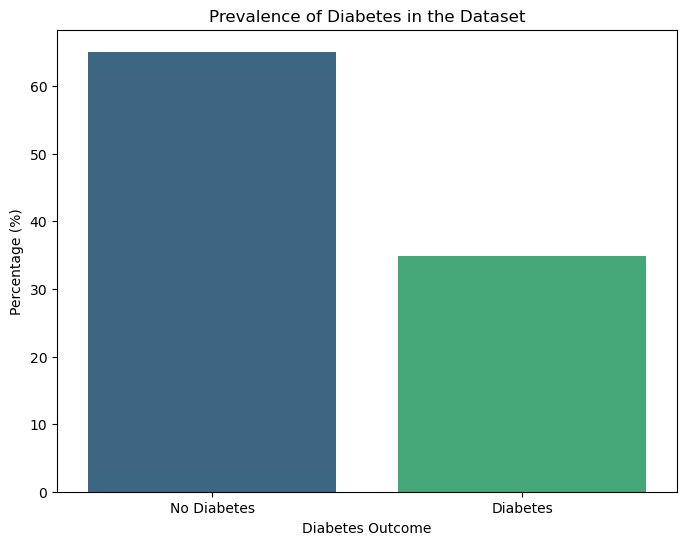

In [245]:
#The bar plot will show the percentage of people with and without diabetes in the dataset. This provides a clear understanding of the balance between the two classes.

diabetes_prevalence = df3['Outcome'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_prevalence.index, y=diabetes_prevalence.values, palette='viridis')
plt.title('Prevalence of Diabetes in the Dataset')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


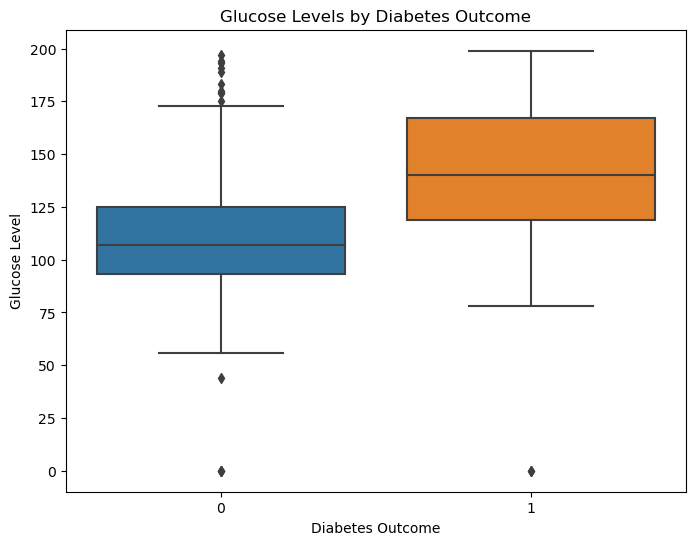

In [246]:
#What is the relationship between Glucose levels and Outcome (whether a person has diabetes or not)
# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df3)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.show()


In [247]:
#the above The plot shows that higher glucose levels are associated with a positive diabetes outcome. 
#The distribution of glucose levels is wider for the diabetic group,
#and the presence of outliers in the non-diabetic group indicates some individuals without diabetes also have unusually low or high glucose levels

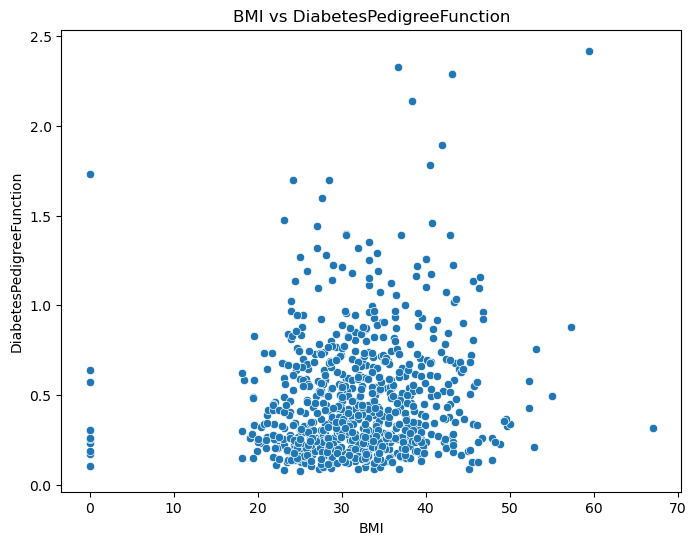

In [248]:
#how does BMI relate to DiabetesPedigreeFunction?
# Scatter plot of BMI vs DiabetesPedigreeFunction
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='DiabetesPedigreeFunction', data=df3)
plt.title('BMI vs DiabetesPedigreeFunction')
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()


In [249]:
#The scatter plot indicates that there is not a strong direct correlation between BMI and Diabetes Pedigree Function.
#The Diabetes Pedigree Function appears to vary widely for individuals with a similar BMI and vice versa

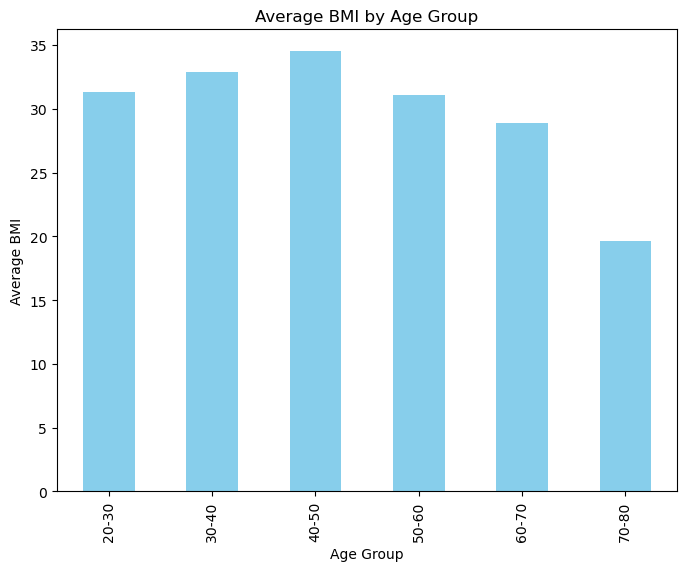

In [250]:
#The bar plot will show the average BMI across different age groups. This analysis might reveal how BMI tends to change with age in this dataset, which can be important for understanding the health of the population

df3['AgeGroup'] = pd.cut(df3['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])


avg_bmi_by_age = df3.groupby('AgeGroup')['BMI'].mean()


plt.figure(figsize=(8, 6))
avg_bmi_by_age.plot(kind='bar', color='skyblue')
plt.title('Average BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()


In [251]:
#The chart suggests that individuals tend to have a higher BMI during middle age,
#particularly between 30 and 60 years old. This could be due to lifestyle factors
#or other health-related reasons that contribute to weight gain during these years

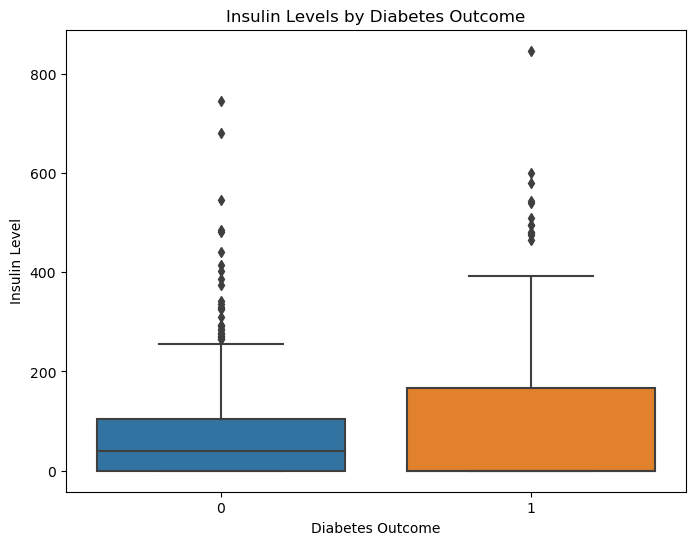

In [252]:
#The boxplot will display the distribution of insulin levels for individuals with and without diabetes. You might observe higher or lower insulin levels in one of the groups indicating its role in diabetes

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df3)
plt.title('Insulin Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Insulin Level')
plt.show()


In [253]:
#The plot suggests that individuals with diabetes generally have higher insulin levels than those without diabetes.
#There is also greater variability in insulin levels among individuals with diabetes
#including a larger number of high insulin 

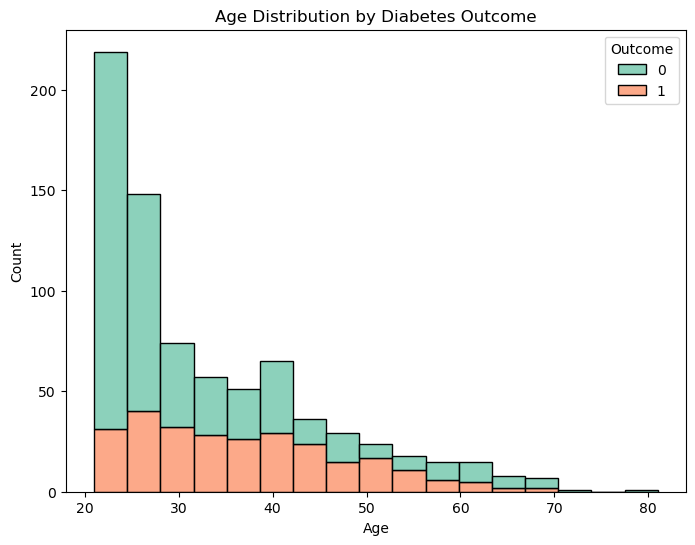

In [254]:
#The histogram will show the distribution of age for individuals with and without diabetes.higher prevalence of diabetes among older individuals may suggest age as a significant factor in diabetes risk
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='Age', hue='Outcome', multiple='stack', palette='Set2')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [255]:
#The histogram shows that diabetes is more common in older age groups. 
#While the overall population in this dataset is going towards younger individuals
#the proportion of individuals with diabetes increases with age
#indicating a correlation between age and the likelihood of having diabetes